### Prediction heart disease using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of prediciting wether someone has heart disease based on their Medical attributes.  


The following approach is going to be taken:
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Defination
In a statement,
> Given clinical parameters about a patient

## 2. Data
The original data came from Cleavland data from the UCI Machine Learning Repo.

They is also a version of it available in Kaggle: https://archive.ics.uci.edu/dataset/45/heart+disease

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll persue the project.


## 4. Features
This is where you'll get different information about each of the features in our data.
    Create data dictionary

      #3  (age)       
      #4  (sex)       
      #9  (cp)        
      #10 (trestbps)  
      #12 (chol)      
      #16 (fbs)       
      #19 (restecg)   
      #32 (thalach)   
      #38 (exang)     
      #40 (oldpeak)   
      #41 (slope)     
      #44 (ca)        
      #51 (thal)      
      #58 (num)       (the predicted attribute)


## Preparing the tools.

We're going to use pandas, Matplotlib and Numpy for data analysis and Manipulation

In [1]:
# import all the tools we need.

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 # we want our plot to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


## Load our data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

# Data Exploration(Exploratory data analysis or EDA)

The aim is to find out more about the data and be verse with the data we are working on.
    1. What questions(s) are we trying to solve ?.
    
    2. What kind of data do we have and how do we treat different types ?.
    
    3. What's missing from the data and how do we deal with it ?.
    
    4. Do we have outliers and do we care about them ?.
    
    5. How can we add, remove featues to get more out of our data ?.

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Finding how many class our in our Target
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

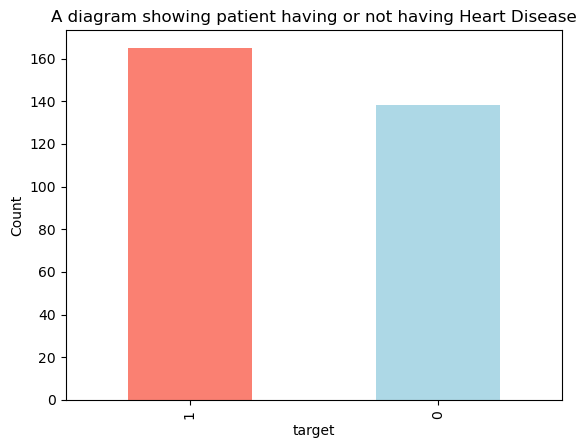

In [6]:
df["target"].value_counts().plot(
    kind="bar",
    color=["salmon", "lightblue"]
)

plt.ylabel("Count")
plt.title("A diagram showing patient having or not having Heart Disease");

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease according to Sex

In [10]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# Compare target column with sex column.
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


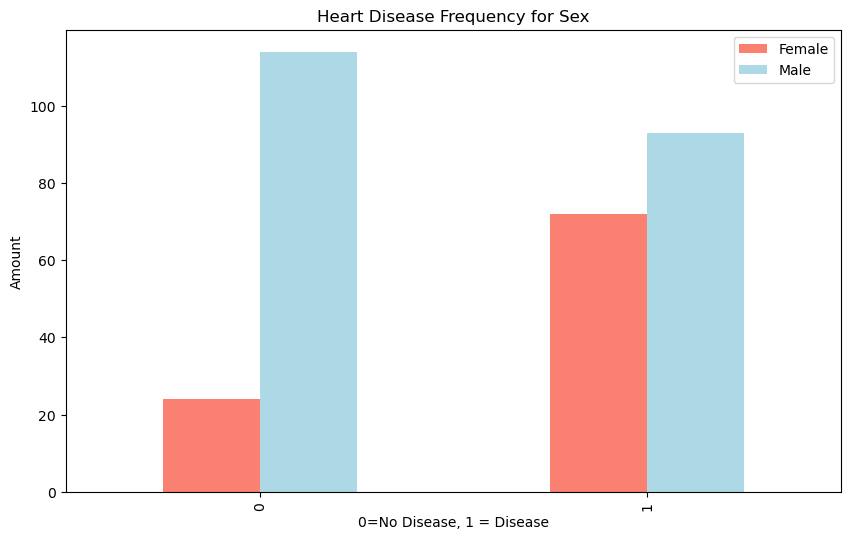

In [12]:
  # Create a plot of crosstab

pd.crosstab(df["target"], df["sex"]).plot(
    kind="bar",
    figsize=(10,6),
    color=["salmon", "lightblue"]
)

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0=No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);

In [13]:
df["exang"].value_counts()

exang
0    204
1     99
Name: count, dtype: int64

In [14]:
pd.crosstab(df["target"], df["exang"])

exang,0,1
target,,
0,62,76
1,142,23


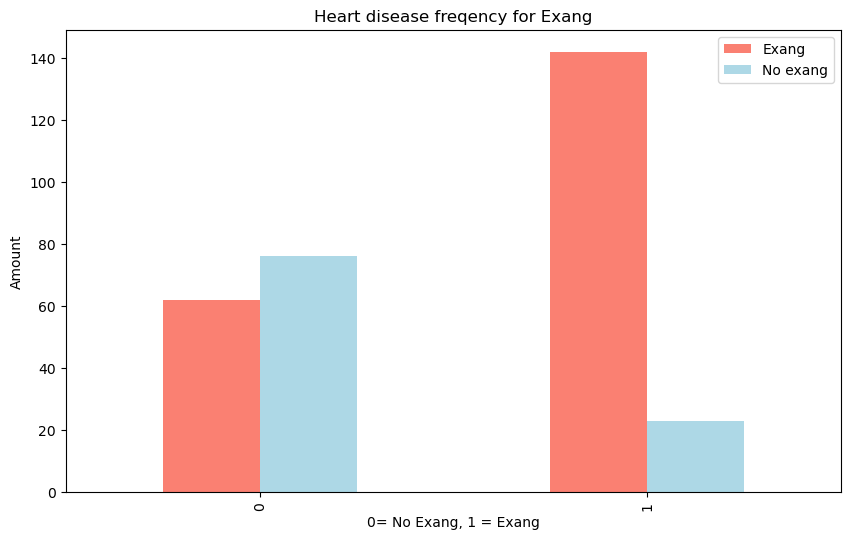

In [15]:
pd.crosstab(df["target"], df["exang"]).plot(
    kind="bar",
    figsize=(10,6),
    color=["salmon", "lightblue"]
)

plt.xlabel("0= No Exang, 1 = Exang")
plt.ylabel("Amount")
plt.title("Heart disease freqency for Exang")
plt.legend(["Exang", "No exang"])

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Age Vs. Max Heart Rate for Heart Disease

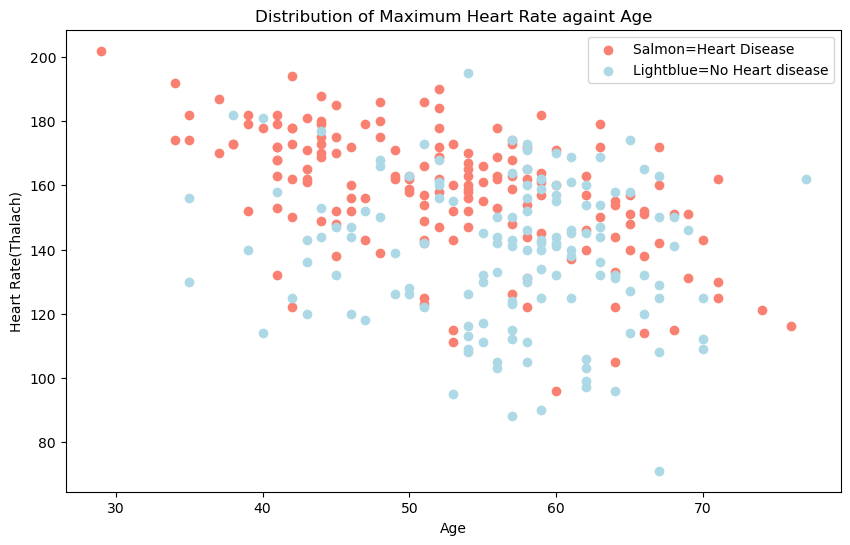

In [17]:
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df["age"][df["target"]==1], df["thalach"][df["target"]==1], c="salmon")

 # Scatter with nevagtive examples
plt.scatter(df["age"][df["target"]==0], df["thalach"][df["target"]==0], c="lightblue")

plt.xlabel("Age")
plt.ylabel("Heart Rate(Thalach)")
plt.title("Distribution of Maximum Heart Rate againt Age")
plt.legend(["Salmon=Heart Disease", "Lightblue=No Heart disease"]);

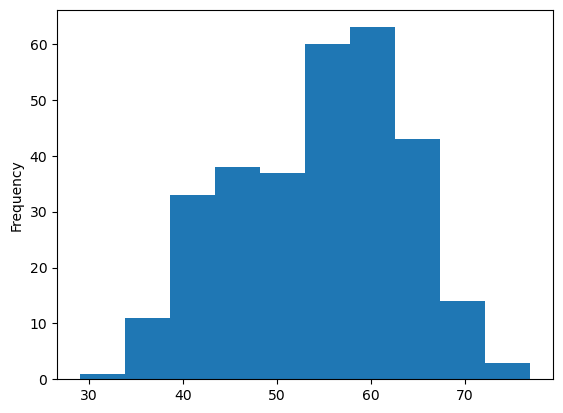

In [18]:
# Check the distribution of the age column with a histogram
df["age"].plot.hist();

In [19]:
df["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

  ### Heart Disease Frequency per Chest Pain Type.
cp - Chest pain type:
    * 0: Typical angina: Chest pain related decrease blood supply to the heart.
    
    * 1: Atypical agina: Chest pain not related to heart
    
    * 2: Non-anginal pain: Typically esophageal spasms(non heart related)
    
    * 3: Asymptomatic: chest pain not showing signs of disease
    


In [20]:
  pd.crosstab(df["cp"], df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


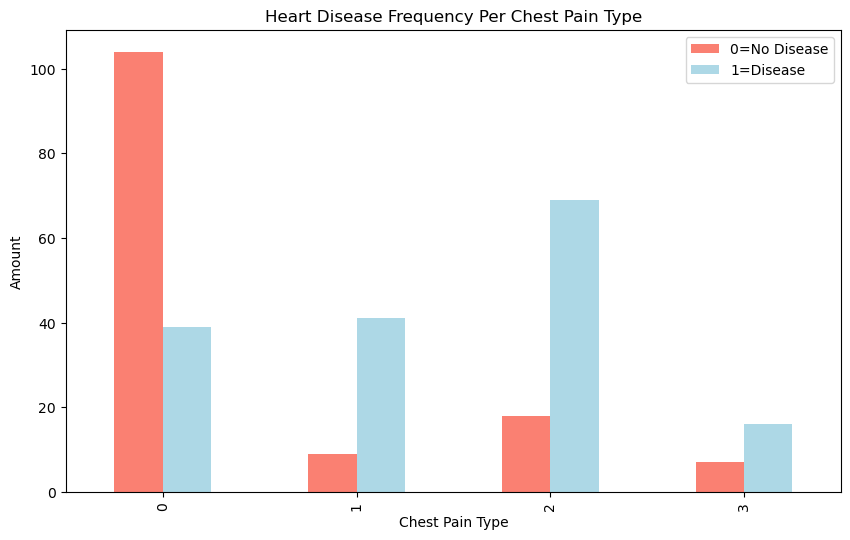

In [21]:
  pd.crosstab(df["cp"], df["target"]).plot(
      kind="bar",
      figsize=(10,6),
      color=["salmon", "lightblue"]
  )
plt.xlabel("Chest Pain Type")
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["0=No Disease", "1=Disease"]);

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Make a correlation matrix

In [23]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

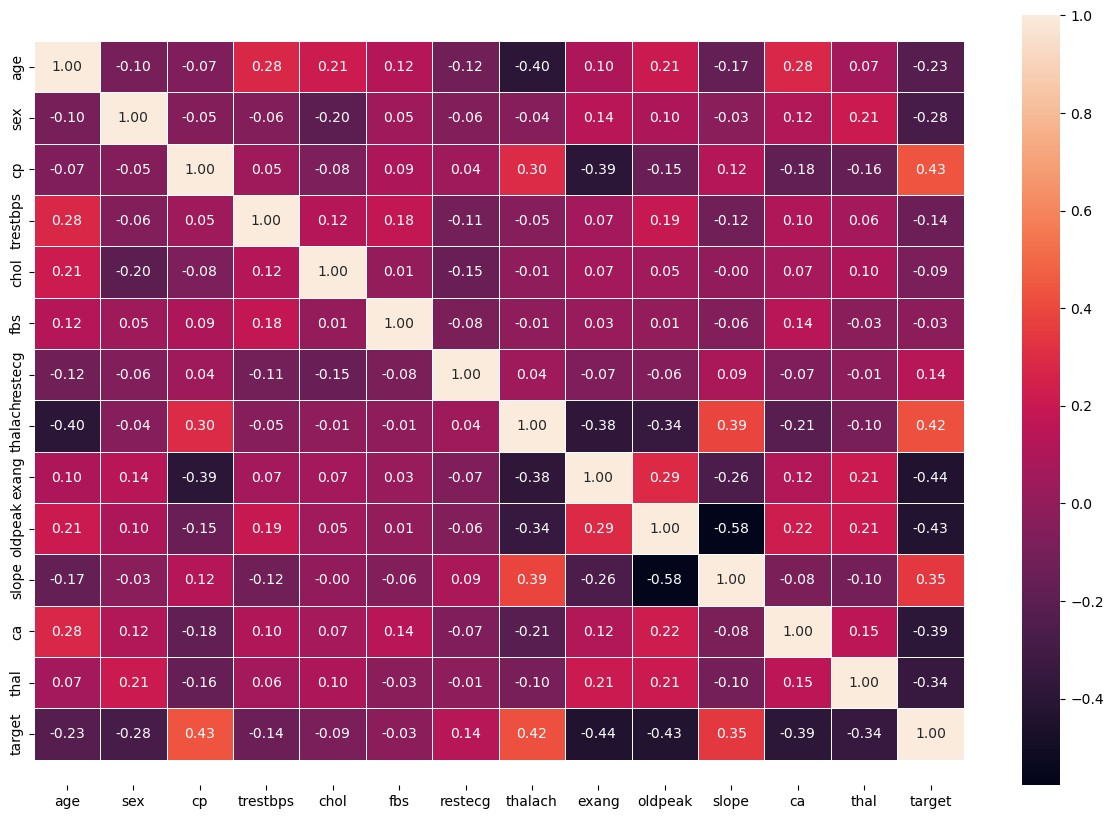

In [24]:
# diagramatically creating our corr using heatmap seaborn

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(
    corr_matrix,
    annot=True,
    linewidths=0.5,
    fmt=".2f",
);

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### 5.0 Modelling

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
# Splitting our data into X and y
X = df.drop("target", axis=1)
y = df["target"]

X.shape, y.shape

((303, 13), (303,))

In [27]:
# Splitting our data into training and Test set.
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [28]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [29]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

We've got our data split into Training and test set. I'ts time to build a ML model. We will train it and test it on the test set.

We are going to try 3 d/f ML models:
1. Logistic Regression
2. K-Nearest Classifier
3. Random Forest Classifier.

In [30]:
# Putting models im a dictionary
models = {
    "Logisitic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Create a function to fit and score model.
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of d/f sklearn machine learning models.
    X_train: training data (no labels)
    X_test: testing data ( no labels)
    y_train: training labels
    y_test: test labels
    """

    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep models score
    model_scores = {}
    # Loop through our models
    for name, model in models.items():  # name is key, model is name of our estimator
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
        

In [31]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\Livingston\Desktop\ml-course\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logisitic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparison

In [32]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare

,Logisitic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


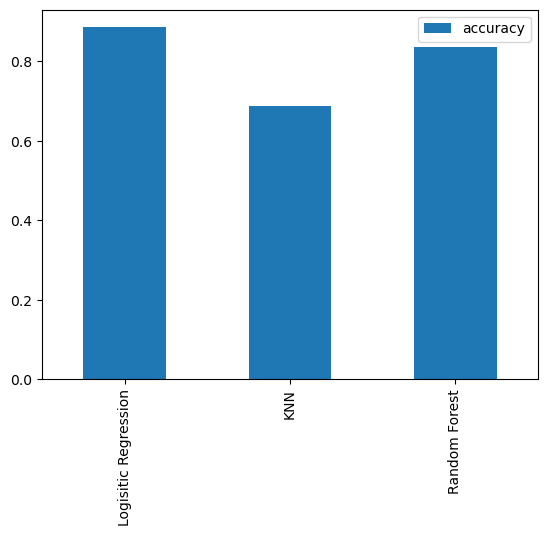

In [33]:
model_compare.T.plot(
    kind="bar"
)
plt.title("Baseline Score of our Model");

### Now we have getting our baseline model. I'ts time we see how we can improve on our model.
Let's look at the following.
* Hyperparmeter tuning 
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* classification report
* ROC curve
* Area under the curve (AUC)



### Hyperparamerter tuning

In [34]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of d/f values for n_neihbors
n_neighbors = np.arange(2, 30, 1)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [35]:
train_scores

[0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058,
 0.6859504132231405,
 0.6694214876033058,
 0.7024793388429752,
 0.6735537190082644,
 0.6983471074380165,
 0.6942148760330579,
 0.6983471074380165,
 0.6859504132231405,
 0.6818181818181818]

In [36]:
test_scores

[0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361]

Maximum KNN score on the test data: 75.41
Maximum KNN score on the train data: 80.99


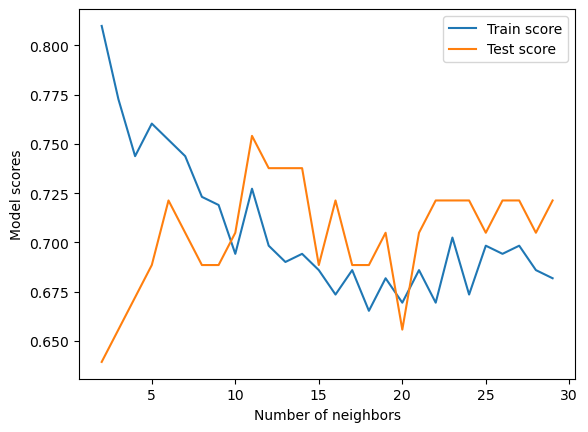

In [37]:
plt.plot(
    n_neighbors, train_scores, label="Train score"
)

plt.plot(
    n_neighbors, test_scores, label="Test score"
)

plt.xlabel("Number of neighbors")
plt.ylabel("Model scores")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores) * 100:.2f}");
print(f"Maximum KNN score on the train data: {max(train_scores) * 100:.2f}")

### Since after doing HyperParameter tuning for KNN it does not yeild the best results hence we will use d/f Estimator.

Let's try out:
* LogisticRegression()
* RandomForestClassifier()
  using RandomizedSearchCV

In [38]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {
    "C": np.logspace(-4,4,20),
    "solver": ["liblinear"]
}

# create a hyperparameter grid for RandomForestClassifier
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 4,5,10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1,20,2)
}

Now we've got hyperparameter grids setup fo each of our models, 
let's tune it using RandomizedSearchCV...

In [39]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv = 5,
                                n_iter=20,
                                verbose=True
                               )

# Fit random hypermaeter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [40]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [41]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

### tuning for RandomForestClassifier

In [42]:
np.random.seed(42)
rs_ran_forest = RandomizedSearchCV(
                RandomForestClassifier(),
                param_distributions= rf_grid,
                cv = 5,
                n_jobs=1,
                n_iter=20,
                verbose=True

    )

rs_ran_forest.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=1,
                   param_distributions={'max_depth': [None, 4, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [43]:
rs_ran_forest.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 4}

In [44]:
rs_ran_forest.score(X_test, y_test)

0.8688524590163934

## Hyperparameter tuning using GridSearchCV

Since our LogisticRegression model provided the best scores so far,

we'll try to improve it using GridSearchCV

In [45]:
# HyperParameter search for LogisticRegression.

rs_log_reg_grid = GridSearchCV(LogisticRegression(),
                                param_grid=log_reg_grid,
                                cv = 5,
                                verbose=True
                               )
#Fit grid hyperparmeter search model
rs_log_reg_grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [46]:
# Checking the best hyperparmeters.
rs_log_reg_grid.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [47]:
# Evalute our GridSearchCV Logistic model
rs_log_reg_grid.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* confusion matrix
* Classification report
* Precision
* Recall
* F1-score

  To make conparisons and evaluate our trained model, we first make predictions.

In [48]:
# Make predictions with tuned model.
y_preds = rs_log_reg_grid.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [49]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

AUC: 0.88


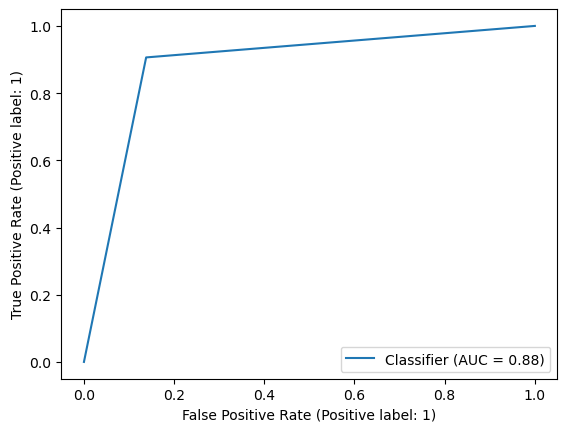

In [50]:
# Plot ROC curve and calculate the AUC matric(Area under the curve)

auc = roc_auc_score(y_test, y_preds)
print(f"AUC: {auc:.2f}")

# Plot the ROC curve.
RocCurveDisplay.from_predictions(y_test, y_preds)

[[25  4]
 [ 3 29]]


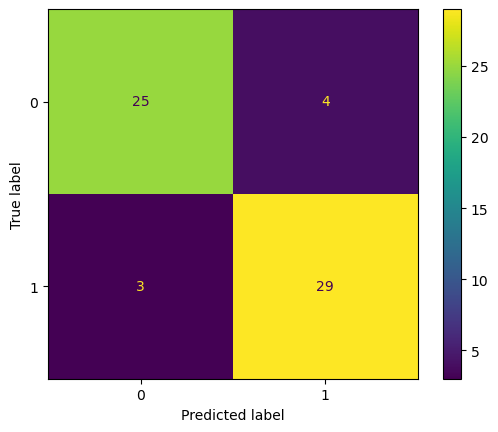

In [51]:
# confusion matrix.
cm_array = metrics.confusion_matrix(y_test, y_preds)
print(cm_array)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_array, display_labels= rs_log_reg_grid.classes_)
cm_display.plot()
plt.show()

We've gotton a ROC curve, AUC matric. Now let's get our classification report as well as cross-validation, recall and f1-score.

In [52]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation.

We're going to caculate precision, recall and f1-score of our model using cv and to do so we will be using cross-val-score

In [53]:
# Check best hyperparmeters.
rs_log_reg_grid.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [54]:
# create a new classifier with the best parameters
clf = LogisticRegression(
        C= 0.23357214690901212,
        solver= 'liblinear'
        )

In [55]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc = cv_acc.mean()
cv_acc

0.8479781420765027

In [56]:
# Cross-validated accuracy
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_precision = cv_precision.mean()
cv_precision

0.8479781420765027

In [57]:
# Cross-validated accuracy
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall = cv_recall.mean()
cv_recall

0.9272727272727274

In [58]:
# Cross-validated accuracy
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = cv_f1.mean()
cv_f1

0.8705403543192143

In [59]:
# Visualize cross-validation metrics
cv_metrics = pd.DataFrame({
                    "Accuracy": cv_acc,
                    "Precision": cv_precision,
                    "Recall": cv_recall,
                    "F1": cv_f1
                }, index=[0])

cv_metrics

,Accuracy,Precision,Recall,F1
0,0.847978,0.847978,0.927273,0.87054


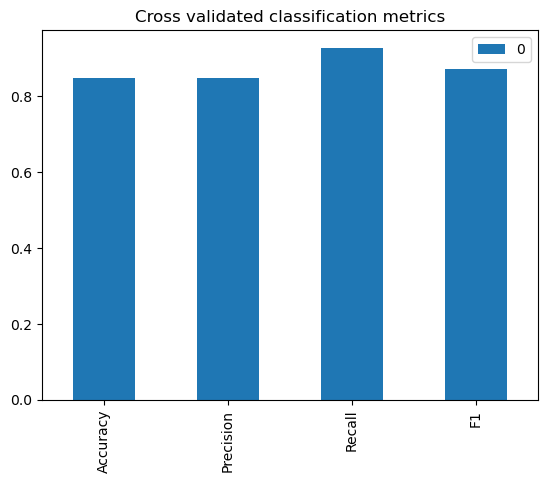

In [60]:
cv_metrics.T.plot(
    kind="bar"
)
plt.title("Cross validated classification metrics");

### Feature importance
Feature importance is another way of asking "Which features contributed most to the outcomes of the model and how did they contribute"

Finding feature importance is d/f for each ML model.

In [61]:
# Fit an instance of LogisticRegression
rs_log_reg_grid.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [62]:
clf = LogisticRegression(
     C = 0.23357214690901212,
     solver = 'liblinear'   
)

clf.fit(X_train, y_train);

In [63]:
# check coef_
clf.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

In [64]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}